In [42]:
import nltk

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Check the files within the corpora:

In [4]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Get one text

In [7]:
emma = nltk.corpus.gutenberg.words('austen-emma.txt')

In [10]:
len(emma)

192427

In [13]:
ema = nltk.Text(nltk.corpus.gutenberg.words('austen-emma.txt'))

In [15]:
ema.concordance('suprize')

no matches


In [24]:
from nltk.corpus import gutenberg

This program displays three statistics for each text: average word length, average sentence length, and the number of times each vocabulary item appears in the text onaverage. The average word length appears to be a general property of English, since it has a recurrent value of 4. 

- The raw() function gives the contents of the file without any linguistic processing.
- For example, len(gutenberg.raw('blake-poems.txt') tells how many letters occur in the text, including the spaces between words. 
- The sents() function divides the text up into its sentences, where each sentence is a list of words.

In [23]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    print(int(num_chars/num_words), int(num_words/num_sents), int(num_words/num_vocab), fileid)

4 24 26 austen-emma.txt
4 26 16 austen-persuasion.txt
4 28 22 austen-sense.txt
4 33 79 bible-kjv.txt
4 19 5 blake-poems.txt
4 19 14 bryant-stories.txt
4 17 12 burgess-busterbrown.txt
4 20 12 carroll-alice.txt
4 20 11 chesterton-ball.txt
4 22 11 chesterton-brown.txt
4 18 10 chesterton-thursday.txt
4 20 24 edgeworth-parents.txt
4 25 15 melville-moby_dick.txt
4 52 10 milton-paradise.txt
4 11 8 shakespeare-caesar.txt
4 12 7 shakespeare-hamlet.txt
4 12 6 shakespeare-macbeth.txt
4 36 12 whitman-leaves.txt


In [27]:
macbeth_sentences = gutenberg.sents('shakespeare-macbeth.txt') 

In [28]:
macbeth_sentences

[['[', 'The', 'Tragedie', 'of', 'Macbeth', 'by', 'William', 'Shakespeare', '1603', ']'], ['Actus', 'Primus', '.'], ...]

NLTK contains also small collection of web text including content from a Firefox discussion forum, conversations overheard in New York, the movie script of Pirates of the Caribbean, personal advertisements, and wine reviews.


In [29]:
from nltk.corpus import webtext

In [30]:
for fileid in webtext.fileids():
    print(fileid, webtext.raw(fileid)[:65], '...')

firefox.txt Cookie Manager: "Don't allow sites that set removed cookies to se ...
grail.txt SCENE 1: [wind] [clop clop clop] 
KING ARTHUR: Whoa there!  [clop ...
overheard.txt White guy: So, do you have any plans for this evening?
Asian girl ...
pirates.txt PIRATES OF THE CARRIBEAN: DEAD MAN'S CHEST, by Ted Elliott & Terr ...
singles.txt 25 SEXY MALE, seeks attrac older single lady, for discreet encoun ...
wine.txt Lovely delicate, fragrant Rhone wine. Polished leather and strawb ...


The corpus is organized into 15 files, where each file contains several hundred posts collected on a given date, for an age-specific chatroom (teens, 20s, 30s, 40s, plus a generic adult‘s chatroom). 


In [31]:
from nltk.corpus import nps_chat

In [32]:
chatroom = nps_chat.posts('10-19-20s_706posts.xml')

In [33]:
chatroom

[['now', 'im', 'left', 'with', 'this', 'gay', 'name'], [':P'], ...]

We can access the corpus as a list of words or a list of sentences (where each sentence is itself just a list of words). 


In [34]:
from nltk.corpus import brown

In [36]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

We can access the corpus as a list of words or a list of sentences (where each sentence is itself just a list of words). 


In [37]:
brown.words(categories='news')

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', ...]

In [38]:
brown.words(fileids=['cg22'])

['Does', 'our', 'society', 'have', 'a', 'runaway', ',', ...]

In [39]:
brown.sents(categories=['news', 'editorial', 'reviews'])

[['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.'], ['The', 'jury', 'further', 'said', 'in', 'term-end', 'presentments', 'that', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'of', 'the', 'election', ',', '``', 'deserves', 'the', 'praise', 'and', 'thanks', 'of', 'the', 'City', 'of', 'Atlanta', "''", 'for', 'the', 'manner', 'in', 'which', 'the', 'election', 'was', 'conducted', '.'], ...]

The Brown Corpus is a convenient resource for studying systematic differences between genres.
We will compare genres in their usage of modal verbs. 
The first step is to produce the counts for a particular genre.


In [40]:
news_text = brown.words(categories='news')

In [44]:
fdist = nltk.FreqDist([w.lower() for w in news_text])

In [45]:
modals = ['can', 'could', 'may', 'might', 'must', 'will']

In [46]:
for m in modals:
    print(m + ":", fdist[m])

can: 94
could: 87
may: 93
might: 38
must: 53
will: 389


The documents have been classified into 90 topics, and grouped into two sets, called “training” and “test”.

In [48]:
from nltk.corpus import reuters

In [49]:
reuters.fileids()

['test/14826',
 'test/14828',
 'test/14829',
 'test/14832',
 'test/14833',
 'test/14839',
 'test/14840',
 'test/14841',
 'test/14842',
 'test/14843',
 'test/14844',
 'test/14849',
 'test/14852',
 'test/14854',
 'test/14858',
 'test/14859',
 'test/14860',
 'test/14861',
 'test/14862',
 'test/14863',
 'test/14865',
 'test/14867',
 'test/14872',
 'test/14873',
 'test/14875',
 'test/14876',
 'test/14877',
 'test/14881',
 'test/14882',
 'test/14885',
 'test/14886',
 'test/14888',
 'test/14890',
 'test/14891',
 'test/14892',
 'test/14899',
 'test/14900',
 'test/14903',
 'test/14904',
 'test/14907',
 'test/14909',
 'test/14911',
 'test/14912',
 'test/14913',
 'test/14918',
 'test/14919',
 'test/14921',
 'test/14922',
 'test/14923',
 'test/14926',
 'test/14928',
 'test/14930',
 'test/14931',
 'test/14932',
 'test/14933',
 'test/14934',
 'test/14941',
 'test/14943',
 'test/14949',
 'test/14951',
 'test/14954',
 'test/14957',
 'test/14958',
 'test/14959',
 'test/14960',
 'test/14962',
 'test/149

In [51]:
reuters.categories()

['acq',
 'alum',
 'barley',
 'bop',
 'carcass',
 'castor-oil',
 'cocoa',
 'coconut',
 'coconut-oil',
 'coffee',
 'copper',
 'copra-cake',
 'corn',
 'cotton',
 'cotton-oil',
 'cpi',
 'cpu',
 'crude',
 'dfl',
 'dlr',
 'dmk',
 'earn',
 'fuel',
 'gas',
 'gnp',
 'gold',
 'grain',
 'groundnut',
 'groundnut-oil',
 'heat',
 'hog',
 'housing',
 'income',
 'instal-debt',
 'interest',
 'ipi',
 'iron-steel',
 'jet',
 'jobs',
 'l-cattle',
 'lead',
 'lei',
 'lin-oil',
 'livestock',
 'lumber',
 'meal-feed',
 'money-fx',
 'money-supply',
 'naphtha',
 'nat-gas',
 'nickel',
 'nkr',
 'nzdlr',
 'oat',
 'oilseed',
 'orange',
 'palladium',
 'palm-oil',
 'palmkernel',
 'pet-chem',
 'platinum',
 'potato',
 'propane',
 'rand',
 'rape-oil',
 'rapeseed',
 'reserves',
 'retail',
 'rice',
 'rubber',
 'rye',
 'ship',
 'silver',
 'sorghum',
 'soy-meal',
 'soy-oil',
 'soybean',
 'strategic-metal',
 'sugar',
 'sun-meal',
 'sun-oil',
 'sunseed',
 'tea',
 'tin',
 'trade',
 'veg-oil',
 'wheat',
 'wpi',
 'yen',
 'zinc']

In [52]:
reuters.categories("training/9865")

['barley', 'corn', 'grain', 'wheat']

In [54]:
reuters.categories(["training/9865", 'training/9880'])

['barley', 'corn', 'grain', 'money-fx', 'wheat']

In [55]:
reuters.fileids('barley')

['test/15618',
 'test/15649',
 'test/15676',
 'test/15728',
 'test/15871',
 'test/15875',
 'test/15952',
 'test/17767',
 'test/17769',
 'test/18024',
 'test/18263',
 'test/18908',
 'test/19275',
 'test/19668',
 'training/10175',
 'training/1067',
 'training/11208',
 'training/11316',
 'training/11885',
 'training/12428',
 'training/13099',
 'training/13744',
 'training/13795',
 'training/13852',
 'training/13856',
 'training/1652',
 'training/1970',
 'training/2044',
 'training/2171',
 'training/2172',
 'training/2191',
 'training/2217',
 'training/2232',
 'training/3132',
 'training/3324',
 'training/395',
 'training/4280',
 'training/4296',
 'training/5',
 'training/501',
 'training/5467',
 'training/5610',
 'training/5640',
 'training/6626',
 'training/7205',
 'training/7579',
 'training/8213',
 'training/8257',
 'training/8759',
 'training/9865',
 'training/9958']

An interesting property of this collection is its time dimension:


In [56]:
from nltk.corpus import inaugural

In [57]:
inaugural.fileids()

['1789-Washington.txt',
 '1793-Washington.txt',
 '1797-Adams.txt',
 '1801-Jefferson.txt',
 '1805-Jefferson.txt',
 '1809-Madison.txt',
 '1813-Madison.txt',
 '1817-Monroe.txt',
 '1821-Monroe.txt',
 '1825-Adams.txt',
 '1829-Jackson.txt',
 '1833-Jackson.txt',
 '1837-VanBuren.txt',
 '1841-Harrison.txt',
 '1845-Polk.txt',
 '1849-Taylor.txt',
 '1853-Pierce.txt',
 '1857-Buchanan.txt',
 '1861-Lincoln.txt',
 '1865-Lincoln.txt',
 '1869-Grant.txt',
 '1873-Grant.txt',
 '1877-Hayes.txt',
 '1881-Garfield.txt',
 '1885-Cleveland.txt',
 '1889-Harrison.txt',
 '1893-Cleveland.txt',
 '1897-McKinley.txt',
 '1901-McKinley.txt',
 '1905-Roosevelt.txt',
 '1909-Taft.txt',
 '1913-Wilson.txt',
 '1917-Wilson.txt',
 '1921-Harding.txt',
 '1925-Coolidge.txt',
 '1929-Hoover.txt',
 '1933-Roosevelt.txt',
 '1937-Roosevelt.txt',
 '1941-Roosevelt.txt',
 '1945-Roosevelt.txt',
 '1949-Truman.txt',
 '1953-Eisenhower.txt',
 '1957-Eisenhower.txt',
 '1961-Kennedy.txt',
 '1965-Johnson.txt',
 '1969-Nixon.txt',
 '1973-Nixon.txt',
 '1

In [58]:
[fileid[:4] for fileid in inaugural.fileids()]

['1789',
 '1793',
 '1797',
 '1801',
 '1805',
 '1809',
 '1813',
 '1817',
 '1821',
 '1825',
 '1829',
 '1833',
 '1837',
 '1841',
 '1845',
 '1849',
 '1853',
 '1857',
 '1861',
 '1865',
 '1869',
 '1873',
 '1877',
 '1881',
 '1885',
 '1889',
 '1893',
 '1897',
 '1901',
 '1905',
 '1909',
 '1913',
 '1917',
 '1921',
 '1925',
 '1929',
 '1933',
 '1937',
 '1941',
 '1945',
 '1949',
 '1953',
 '1957',
 '1961',
 '1965',
 '1969',
 '1973',
 '1977',
 '1981',
 '1985',
 '1989',
 '1993',
 '1997',
 '2001',
 '2005',
 '2009',
 '2013',
 '2017',
 '2021']

The following code converts the words in the Inaugural corpus to lowercase using w.lower() , then checks whether they start with either of the “targets” america or citizen using startswith().


In [60]:
cfd = nltk.ConditionalFreqDist((target, fileid[:4])
                              for fileid in inaugural.fileids()
                              for w in inaugural.words(fileid)
                              for target in ['america', 'citizen']
                              if w.lower().startswith(target))

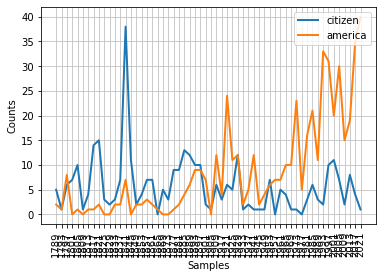

AttributeError: 'AxesSubplot' object has no attribute 'show'

In [61]:
cfd.plot().show()

Whereas FreqDist() takes a simple list as input, ConditionalFreqDist() takes a list of pairs. 

In [62]:
from nltk.corpus import brown 

In [63]:
cfd = nltk.ConditionalFreqDist((genre, word) for genre in brown.categories()
                              for word in brown.words(categories=genre))

For each genre, we loop over every word in the genre, producing pairs consisting of the genre and the word : 

In [67]:
genre_word = [(genre, word)
              for genre in ['news', 'romance']
              for word in brown.words(categories=genre)]

In [70]:
len(genre_word)

170576

Pairs at the beginning of the list genre_word will be of the form ('news', word) , whereas those at the end will be of the form ('romance', word).

In [71]:
genre_word[:4]

[('news', 'The'), ('news', 'Fulton'), ('news', 'County'), ('news', 'Grand')]

In [72]:
genre_word[-4:]

[('romance', 'afraid'),
 ('romance', 'not'),
 ('romance', "''"),
 ('romance', '.')]

We can now use this list of pairs to create a ConditionalFreqDist, and save it in a variable cfd. 

In [73]:
cfd = nltk.ConditionalFreqDist(genre_word)

In [74]:
cfd

<ConditionalFreqDist with 2 conditions>

In [76]:
cfd.conditions()

['news', 'romance']

In [77]:
cfd['news']

FreqDist({'the': 5580, ',': 5188, '.': 4030, 'of': 2849, 'and': 2146, 'to': 2116, 'a': 1993, 'in': 1893, 'for': 943, 'The': 806, ...})

We can now use this list of pairs to create a ConditionalFreqDist, and save it in a variable cfd. 

In [79]:
list(cfd['news'])

['the',
 ',',
 '.',
 'of',
 'and',
 'to',
 'a',
 'in',
 'for',
 'The',
 'that',
 '``',
 'is',
 'was',
 "''",
 'on',
 'at',
 'with',
 'be',
 'by',
 'as',
 'he',
 'said',
 'his',
 'will',
 'it',
 'from',
 'are',
 ';',
 'an',
 'has',
 '--',
 'had',
 'who',
 'have',
 'not',
 'Mrs.',
 'were',
 'this',
 'which',
 'would',
 'their',
 'been',
 'they',
 'He',
 'one',
 'I',
 'but',
 'its',
 'or',
 ')',
 'more',
 'Mr.',
 '(',
 'up',
 'all',
 'out',
 'last',
 'two',
 'other',
 ':',
 'new',
 'first',
 'than',
 'year',
 'A',
 'about',
 'there',
 'when',
 'home',
 'after',
 'In',
 'also',
 'It',
 'over',
 'into',
 'no',
 'But',
 'made',
 'only',
 'her',
 'years',
 'time',
 'three',
 'them',
 'some',
 'can',
 'him',
 'New',
 'any',
 'state',
 '?',
 'President',
 'before',
 'week',
 'could',
 'under',
 'against',
 'we',
 'what',
 'now',
 'most',
 'if',
 'off',
 'four',
 'man',
 'House',
 'such',
 'This',
 'back',
 'members',
 'so',
 'here',
 'American',
 'may',
 'program',
 'work',
 'get',
 'Kennedy',


In [80]:
cfd['news']['could']

86

In [81]:
from nltk.corpus import udhr

In [86]:
languages = ["Chickasaw", "English", "German_Deutsch", "Greenlandic_Inuktikut", "Hungarian_Magyar", "Ibibio_Efik"]

In [87]:
cfd = nltk.ConditionalFreqDist((len, len(word))
                               for lang in languages
                               for word in udhr.words(lang + "-Latin1"))

For example, we can tabulate the cumulative frequency data just for two languages, and for words less than 10 characters long, as shown next. 

In [88]:
cfd.tabulate(conditions=["English", "German_Deutsch"],
            samples=range(10), culmulative=True)

               0 1 2 3 4 5 6 7 8 9 
       English 0 0 0 0 0 0 0 0 0 0 
German_Deutsch 0 0 0 0 0 0 0 0 0 0 
